In [2]:
from google.colab import files
files.upload()  # Upload the 'kaggle.json' file here

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle competitions download -c airbnb-recruiting-new-user-bookings

# Extract the dataset
!unzip airbnb-recruiting-new-user-bookings.zip


Saving kaggle.json to kaggle.json
 88% 57.0M/64.7M [00:00<00:00, 113MB/s] 
100% 64.7M/64.7M [00:00<00:00, 112MB/s]
Archive:  airbnb-recruiting-new-user-bookings.zip
  inflating: age_gender_bkts.csv.zip  
  inflating: countries.csv.zip       
  inflating: sample_submission_NDF.csv.zip  
  inflating: sessions.csv.zip        
  inflating: test_users.csv.zip      
  inflating: train_users_2.csv.zip   


File extracted successfully.
Extracted files:
['train_users_2.csv']

Dataset loaded successfully.

Dataset Shape: (213451, 16)

Columns and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_t

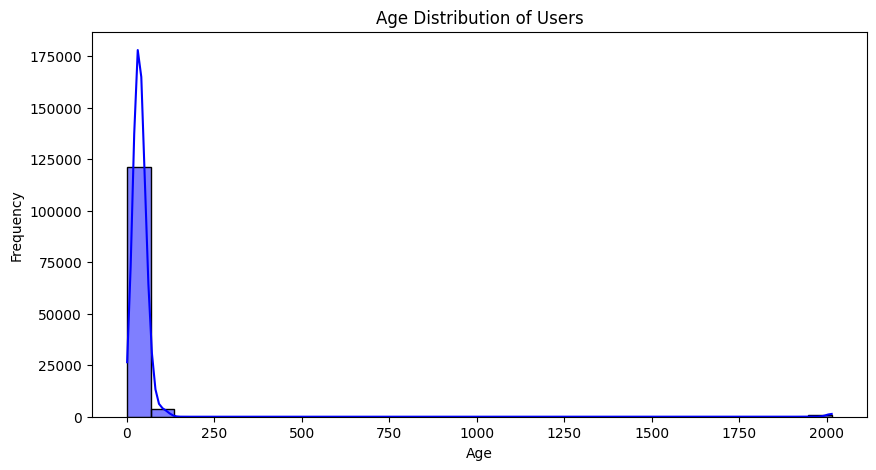

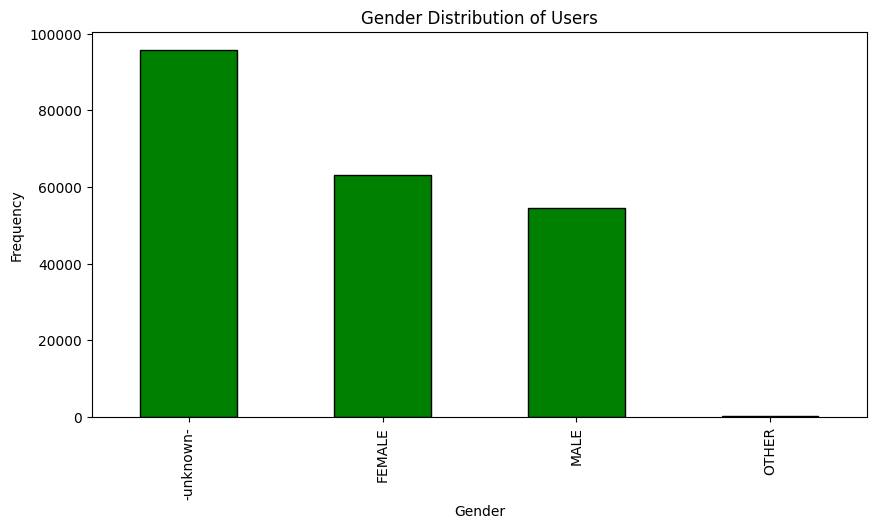

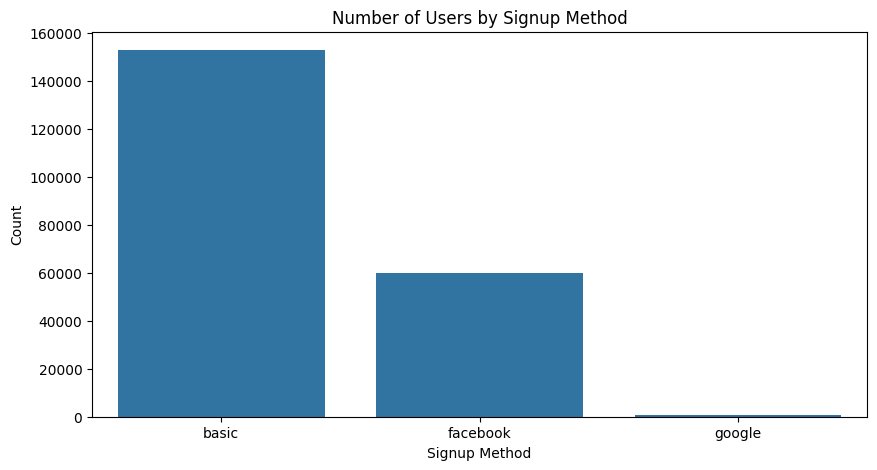


Cleaned dataset saved as 'train_users_2.csv/cleaned_airbnb_data.csv'.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile

# Step 1: Extract the uploaded zip file
uploaded_zip_path = "train_users_2.csv.zip"
extracted_path = "train_users_2.csv"

try:
    with zipfile.ZipFile(uploaded_zip_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_path)
    print("File extracted successfully.")
except zipfile.BadZipFile:
    print("The uploaded file is not a valid zip file.")

# Step 2: Check extracted files
print("Extracted files:")
print(os.listdir(extracted_path))

# Update file path to the extracted CSV
file_path = os.path.join(extracted_path, "train_users_2.csv")  # Assuming this is the correct extracted file name

try:
    # Step 3: Load the dataset
    df = pd.read_csv(file_path)
    print("\nDataset loaded successfully.")

    # Display basic information about the dataset
    print("\nDataset Shape:", df.shape)
    print("\nColumns and Data Types:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Step 4: Perform EDA and Visualizations
    # Distribution of Age
    plt.figure(figsize=(10, 5))
    sns.histplot(df['age'].dropna(), bins=30, kde=True, color='blue', edgecolor='black')
    plt.title('Age Distribution of Users')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

    # Gender Distribution
    plt.figure(figsize=(10, 5))
    df['gender'].value_counts().plot(kind='bar', color='green', edgecolor='black')
    plt.title('Gender Distribution of Users')
    plt.xlabel('Gender')
    plt.ylabel('Frequency')
    plt.show()

    # Signup Method Distribution
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x='signup_method', order=df['signup_method'].value_counts().index)
    plt.title('Number of Users by Signup Method')
    plt.xlabel('Signup Method')
    plt.ylabel('Count')
    plt.show()

    # Step 5: Save the dataset for preprocessing and modeling
    cleaned_file_path = os.path.join(extracted_path, 'cleaned_airbnb_data.csv')
    df.to_csv(cleaned_file_path, index=False)
    print(f"\nCleaned dataset saved as '{cleaned_file_path}'.")

except FileNotFoundError:
    print(f"\nFile not found: {file_path}. Please ensure the dataset is correctly extracted.")


In [11]:
# Step 6: Handle Missing Values and Perform Feature Preprocessing

# Handle Missing Values
# Fill missing 'age' with the median age
df['age'].fillna(df['age'].median(), inplace=True)

# Fill missing 'date_first_booking' with a placeholder (e.g., 'Unknown')
df['date_first_booking'].fillna('Unknown', inplace=True)

# Fill missing 'first_affiliate_tracked' with a placeholder (e.g., 'Untracked')
df['first_affiliate_tracked'].fillna('Untracked', inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())

# Feature Preprocessing
# Convert 'date_account_created' to datetime
df['date_account_created'] = pd.to_datetime(df['date_account_created'])

# Check if 'timestamp_first_active' column exists before processing it
if 'timestamp_first_active' in df.columns:
    # The 'timestamp_first_active' column exists, so convert it to datetime
    df['timestamp_first_active'] = pd.to_datetime(df['timestamp_first_active'], format='%Y%m%d%H%M%S')

    # Extract year, month, and day as new features from 'timestamp_first_active'
    # ... (Your code for extracting features from timestamp_first_active) ...

    # Drop the original 'timestamp_first_active' column if needed
    df.drop(columns=['timestamp_first_active'], inplace=True)
else:
    print("Column 'timestamp_first_active' not found in the DataFrame. Skipping related operations.")

# Extract year, month, and day as new features from 'date_account_created'
df['year_account_created'] = df['date_account_created'].dt.year
df['month_account_created'] = df['date_account_created'].dt.month
df['day_account_created'] = df['date_account_created'].dt.day


# Encode categorical variables using one-hot encoding for modeling
categorical_columns = [
    'gender', 'signup_method', 'language', 'affiliate_channel',
    'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
    'first_device_type', 'first_browser'
]
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print("\nDataset after feature preprocessing:")
print(df_encoded.head())

# Save the preprocessed dataset for clustering and modeling
preprocessed_file_path = 'preprocessed_airbnb_data.csv'
df_encoded.to_csv(preprocessed_file_path, index=False)
print(f"\nPreprocessed dataset saved as '{preprocessed_file_path}'.")

<ipython-input-11-04a113595f8a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
<ipython-input-11-04a113595f8a>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us


Missing values after handling:
id                         0
date_account_created       0
date_first_booking         0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
year_account_created       0
month_account_created      0
day_account_created        0
dtype: int64
Column 'timestamp_first_active' not found in the DataFrame. Skipping related operations.

Dataset after feature preprocessing:
           id date_account_created date_first_booking   age  signup_flow  \
0  gxn3p5htnn           2010-06-28            Unknown  34.0            0   
1  820tgsjxq7           2011-05-25            Unknown  38.0            0   
2  4ft3gnwmtx           2010-09-28         2010-08-02  56.0            3   
3 

<ipython-input-16-bee7b0fb406a>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clustering['age'].fillna(df_clustering['age'].median(), inplace=True)


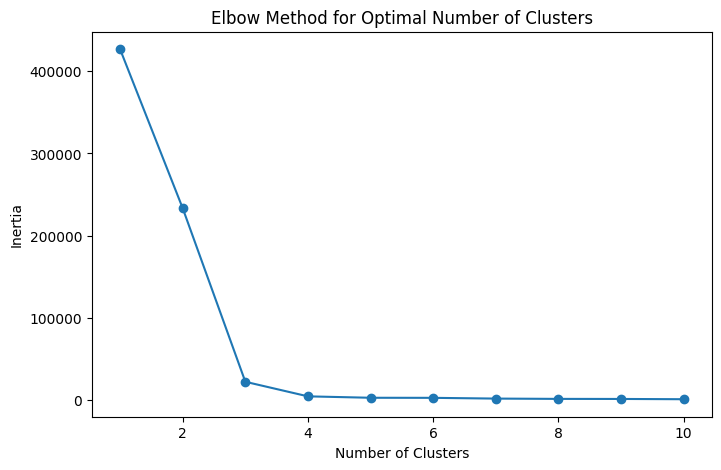

Clustering and Anomaly Detection Results:


,id,cluster,distance_to_center,is_anomaly
0,gxn3p5htnn,0,0.035968,False
1,820tgsjxq7,0,0.033029,False
2,4ft3gnwmtx,0,0.398167,False
3,bjjt8pjhuk,0,0.055907,False
4,87mebub9p4,0,0.049063,False
...,...,...,...,...
213446,zxodksqpep,0,0.047266,False
213447,mhewnxesx9,0,0.035968,False
213448,6o3arsjbb4,0,0.047266,False
213449,jh95kwisub,1,0.064403,False



Clustering results saved to clustering_results.csv.


In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 2: Data Preparation for Clustering

# Select relevant numerical features for clustering
clustering_features = ['age', 'signup_flow']

# Extract the necessary data and handle any remaining missing values
df_clustering = df[clustering_features].copy()
df_clustering['age'].fillna(df_clustering['age'].median(), inplace=True)

# Normalize the data using StandardScaler
scaler = StandardScaler()
clustering_data = scaler.fit_transform(df_clustering)

# Step 3: Perform K-Means Clustering
# Determine the optimal number of clusters using the elbow method
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(clustering_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Step 4: Apply K-Means with Optimal Clusters (e.g., 4 based on elbow method)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init='auto')
df['cluster'] = kmeans.fit_predict(clustering_data)

# Step 5: Analyze Clusters
cluster_summary = df.groupby('cluster').agg({
    'age': ['mean', 'median'],
    'signup_flow': ['mean', 'median'],
    'id': 'count'  # Number of users in each cluster
}).rename(columns={'id': 'user_count'})

# Step 6: Anomaly Detection
# Calculate distances of points from their respective cluster centers
distances = kmeans.transform(clustering_data)
df['distance_to_center'] = np.min(distances, axis=1)

# Define anomalies as points farthest from the cluster centers (e.g., top 1%)
anomaly_threshold = np.percentile(df['distance_to_center'], 99)
df['is_anomaly'] = df['distance_to_center'] > anomaly_threshold

# Save results for further steps
clustering_results_path = "clustering_results.csv"
df.to_csv(clustering_results_path, index=False)

# Display the cluster summary and save clustering results
print("Clustering and Anomaly Detection Results:")
display(df[['id', 'cluster', 'distance_to_center', 'is_anomaly']])

print(f"\nClustering results saved to {clustering_results_path}.")

In [21]:
!pip install autoviml

In [1]:
!pip install scikit-learn==1.2.2
!pip install imbalanced-learn==0.9.1

  Using cached imbalanced_learn-0.9.1-py3-none-any.whl.metadata (13 kB)
Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.4
    Uninstalling imbalanced-learn-0.12.4:
      Successfully uninstalled imbalanced-learn-0.12.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autoviml 0.1.800 requires imbalanced-learn>=0.10.1, but you have imbalanced-learn 0.9.1 which is incompatible.


In [2]:
!pip install --upgrade --force-reinstall autoviml pandas==1.3.3 scikit-learn==0.24.2 numpy==1.21.2


  Using cached autoviml-0.1.800-py3-none-any.whl.metadata (13 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 36.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [4]:
!pip uninstall scipy -y


Found existing installation: scipy 1.14.1
Uninstalling scipy-1.14.1:
  Successfully uninstalled scipy-1.14.1


In [5]:
!pip install scipy==1.7.3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 72.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.19 requires numpy>=1.24.4, but you have numpy 1.22.4 which is incompatible.
albumentations 1.4.20 requires numpy>=1.24.4, but you have numpy 1.22.4 which is incompatible.
albumentations 1.4.20 requires scipy>=1.10.0, but you have scipy 1.7.3 which is incompatible.
arviz 0.20.0 requires numpy>=1.23.0, but you have numpy 1.22.4 which is incompatible.
arviz 0.20.0 requires scipy>=1.9.0, but you have scipy 1.7.3 which is incompatible.
astropy 6.1.6 requires numpy>=1.23, but you have numpy 1.22.4 which 

In [1]:
!pip install --upgrade --force-reinstall numpy==1.23




  Using cached numpy-1.23.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.2 kB)
Using cached numpy-1.23.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.0
    Uninstalling numpy-1.23.0:
      Successfully uninstalled numpy-1.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.19 requires numpy>=1.24.4, but you have numpy 1.23.0 which is incompatible.
albumentations 1.4.20 requires numpy>=1.24.4, but you have numpy 1.23.0 which is incompatible.
albumentations 1.4.20 requires scipy>=1.10.0, but you have scipy 1.7.3 which is incompatible.
arviz 0.20.0 requires scipy>=1.9.0, but you have scipy 1.7.3 which is incompatible.
autoviml 0.1.800 requires numpy>=1.24, but you have numpy 1.23.0 which is incompatible.
bigframes 1.25.0 require

Imported Auto_ViML version: 0.1.800. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            GPU_flag=False, verbose=1)
            

Imported Auto_NLP version: 0.1.01.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


NameError: name 'df' is not defined


Starting AutoViML training...
##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise, Random Forests will take too long for 10,000+ rows
Training Set Shape = (170760, 128)
    Training Set Memory Usage = 28.99 MB
Test Set Shape = (42691, 127)
    Test Set Memory Usage = 6.92 MB
Single_Label Target: ['country_destination']

################ Multi_Classification VISUALIZATION Started #####################
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
ALERT! Setting Imbalanced_Flag to True in Auto_ViML for Multi_Classification problems improves results!
       Class  -> Counts -> Percent
          AU:     431  ->    0.3%
          CA:    1142  ->    0.7%
          DE:     849  ->    0.5%
          ES:    1799  ->    1.1%
          FR:    4018  ->    2.4%
          GB:    1859  ->    1.1%
          IT:    2268  ->    1.3%

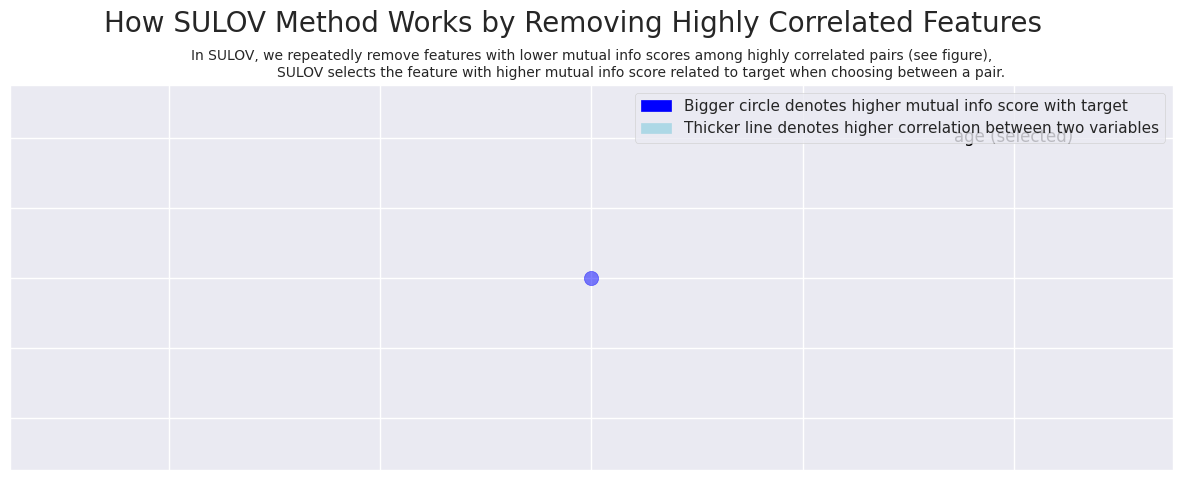

Splitting selected features into float and categorical (integer) variables:
    (1) float variables ...
    (125) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 126 
    Finding Important Features using Boosted Trees algorithm...
        using 126 variables...
        using 101 variables...
        using 76 variables...
        using 51 variables...
        using 26 variables...
Found 59 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  136608 , CV rows =  34152
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data
Performing MinMax

/usr/local/lib/python3.10/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/local/lib/python3.10/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


    Actual training time (in seconds): 10355
###########  Single_Label  M O D E L   R E S U L T S #################
5-fold Cross Validation  accuracy = 53.4%
    Best Parameters for Model = {'C': 41.166323884293845}
Using a Calibrated Classifier in this Multi_Classification dataset to improve results...
########################################################
Linear Model Prediction Results on Held Out CV Data Set:
Multi Class Model Metrics Report
#####################################################
    Accuracy          = 60.5%
    Balanced Accuracy (average recall) = 10.0%
    Average Precision (macro) = 9.2%
    Precisions by class:
    64.5%      45.6%      0.0%      0.0%      0.0%      0.0%      0.0%      0.0%      0.0%      0.0%      0.0%      0.0%  
    Recall Scores by class:
    87.4%      32.6%      0.0%      0.0%      0.0%      0.0%      0.0%      0.0%      0.0%      0.0%      0.0%      0.0%  
    F1 Scores by class:
    74.2%      38.0%      0.0%      0.0%      0.0%      0

<Figure size 1500x750 with 0 Axes>

In [7]:
from autoviml.Auto_ViML import Auto_ViML
from scipy.interpolate import interp1d
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv('preprocessed_airbnb_data.csv')

target_column = 'country_destination'
columns_to_drop = ['id', 'date_account_created', 'date_first_booking', 'distance_to_center', 'is_anomaly', 'cluster']

# Drop only existing columns from the dataset
existing_columns = [col for col in columns_to_drop if col in df.columns]
df_modeling = df.drop(columns=existing_columns)

# Ensure the target variable is in string format (required by AutoViML)
df_modeling[target_column] = df_modeling[target_column].astype(str)

# Split the data into train and test sets
X = df_modeling.drop(columns=[target_column])
y = df_modeling[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Combine X_train and y_train for AutoViML input
train_data = pd.concat([X_train, y_train], axis=1)

# Step 4: Train AutoViML Model
print("\nStarting AutoViML training...")
# Changed 'scoring' to 'scoring_parameter' to match the function signature of Auto_ViML
model, features, train_modified, test_modified = Auto_ViML(
    train=train_data,
    target=target_column,
    test=X_test,
    scoring_parameter='accuracy',  # Use 'scoring_parameter' instead of 'eval_metric' or 'scoring'
    hyper_param='RS',
    feature_reduction=True,
    verbose=1
)

# Step 5: Evaluate the Model
print("\nAutoViML Model Training Complete. Here are the important features:")
print(features)

# Save the modified datasets and model details for further use if needed
train_modified.to_csv('train_modified.csv', index=False)
test_modified.to_csv('test_modified.csv', index=False)

print("\nModified train and test datasets saved for review. AutoViML processing complete.")